# A. Importing, cleaning and numerical summaries

1. Download the data set data.csv from the Resources tab.
2. Import the data as a pandas DataFrame.
3. Check the number of observations.
4. Obtain the column headings.
5. Check the data type for each column.
6. Check if there are any missing values.
7. If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.
8. Obtain the mean, minimum and maximum value for each column containing numerical data.
9. List the 10 happiest countries, ordered by their happiness score.
10. List the 10 least happy countries, ordered by their happiness score.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


In [2]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

In [3]:
df.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

In [4]:
df.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

-- > Two null values in the 'Job Satisfaction' column, which is also clear from the `df.info()` command earlier : 151 non-null elements

In [5]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 152
Data columns (total 12 columns):
Country             151 non-null object
Happiness Rank      151 non-null int64
Happiness Score     151 non-null float64
Economy             151 non-null float64
Family              151 non-null float64
Health              151 non-null float64
Freedom             151 non-null float64
Generosity          151 non-null float64
Corruption          151 non-null float64
Dystopia            151 non-null float64
Job Satisfaction    151 non-null float64
Region              151 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 15.3+ KB


In [6]:
df.iloc[:,1:11].agg(['mean', 'min', 'max'])

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [7]:
df[['Country', 'Happiness Rank']].sort_values('Happiness Rank').head(10)

,Country,Happiness Rank
109,Norway,1
97,Denmark,2
47,Iceland,3
78,Switzerland,4
101,Finland,5
105,Netherlands,6
81,Canada,7
5,New Zealand,8
21,Sweden,9
148,Australia,10


In [8]:
df[['Country', 'Happiness Rank']].sort_values('Happiness Rank', ascending=False).head(10)

,Country,Happiness Rank
79,Central African Republic,155
40,Burundi,154
45,Tanzania,153
39,Syria,152
133,Rwanda,151
53,Togo,150
107,Guinea,149
139,Liberia,148
138,Yemen,146
124,Haiti,145


# B. Indexing and grouping

1. Group the data points by region and save them into separate .csv files ex. a Western Europe.csv with all the data for countries in Western Europe and so on for the other 5 regions.

In [9]:
for i in df['Region'].unique():
    df[df['Region'] == i].to_csv(i+'.csv', index=False)

2. Compute the mean happiness score for each region and rank the regions from most happy to least happy.

In [10]:
df_grouped = df.groupby('Region')['Happiness Score'].agg(['mean'])
df_grouped['rank']=df_grouped['mean'].rank(ascending=False)

In [11]:
df_grouped.sort_values('rank')

,mean,rank
Region,,
North America,7.154500,1.0
Western Europe,6.880474,2.0
Latin America,5.957818,3.0
Eastern Europe,5.498952,4.0
Asia-Pacific,5.358326,5.0
Africa,4.254581,6.0
Europe,4.096000,7.0


3. Compute the number of countries in each region that have a happiness score above 6.0.

In [12]:
df[df['Happiness Score'] > 6].groupby('Region')['Happiness Score'].count()

Region
Asia-Pacific      11
Eastern Europe     1
Latin America     13
North America      2
Western Europe    17
Name: Happiness Score, dtype: int64

--> Africa and Europe are not in the output serie, thus they have 0 countries each with Happiness Score > 6

4. Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [13]:
df.groupby('Region')['Happiness Score'].agg(lambda x:max(x)-min(x)).sort_values(ascending=False)

Region
Asia-Pacific      3.852
Latin America     3.476
Africa            3.179
Western Europe    2.342
Eastern Europe    1.454
North America     0.323
Europe            0.000
Name: Happiness Score, dtype: float64

--> Asia-Pasific region has the largest range of happiness scores :)

# C. Bar plot of the Happiness Score

1. Obtain a horizontal bar plot of the Happiness Score of the top 10 happiest countries. Your bar chart should have the names of the countries are listed vertically along the y-axis and the x-axis should have labels for each number from 0 to 8. Ensure that the chart has an appropriate title and labels.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
toplot = df[['Country', 'Happiness Score', 'Happiness Rank']].sort_values('Happiness Rank').head(10)

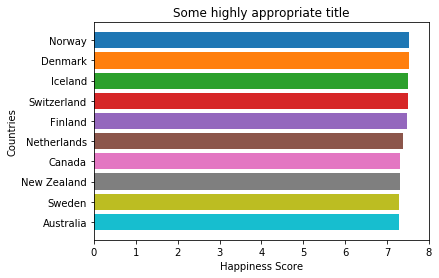

In [16]:
colormap = plt.cm.tab10(range(0, 10))
plt.barh(np.arange(10),toplot['Happiness Score'],color=colormap)
plt.yticks(np.arange(10),toplot['Country'])
plt.xticks(np.arange(9))
plt.ylabel("Countries")
plt.xlabel("Happiness Score")
plt.title("Some highly appropriate title")
plt.gca().invert_yaxis()
plt.show()

2. You will now modify the horizontal bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns:
* Economy
* Family
* Health
* Freedom
* Generosity
* Corruption
* Dystopia

Choose a distinct color for each category and include an appropriate legend with your chart.

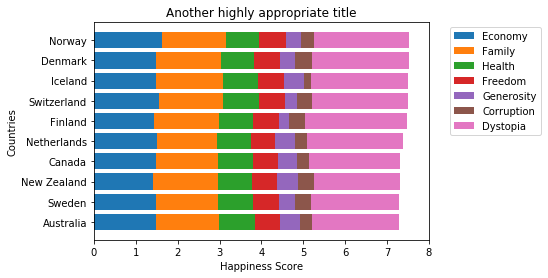

In [17]:
toplot = df.sort_values('Happiness Rank').head(10)
plotted = [0] * 10
for i in toplot.columns[3:10]:
    plt.barh(np.arange(10),toplot[i], left=plotted, label=i)
    plotted = plotted + toplot[i]
plt.yticks(np.arange(10),toplot['Country'])
plt.xticks(np.arange(9))
plt.ylabel("Countries")
plt.xlabel("Happiness Score")
plt.title("Another highly appropriate title")
plt.legend(loc="upper left", bbox_to_anchor=(1.05,1))
plt.gca().invert_yaxis()
plt.show()

3. Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider all countries from the region Africa.

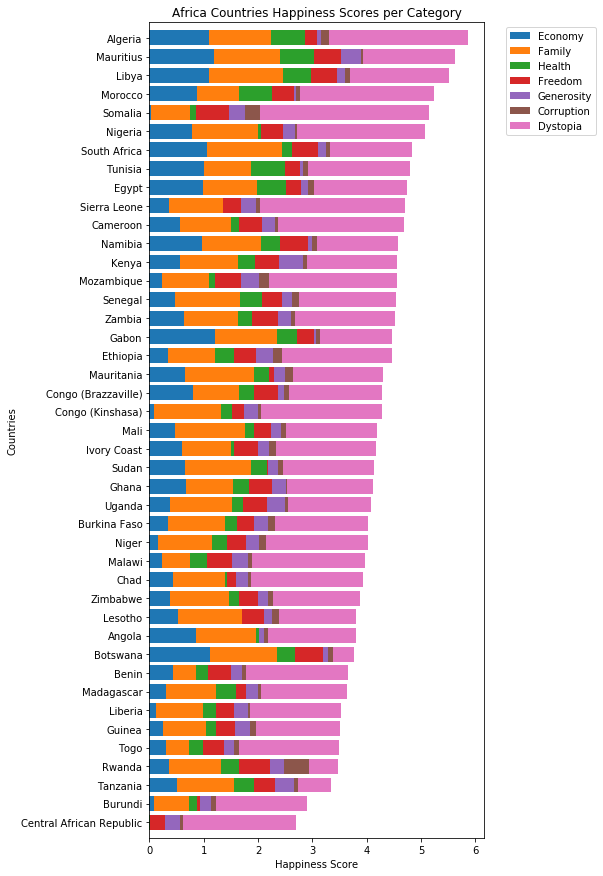

In [18]:
toplot = df[df['Region']=='Africa'].sort_values('Happiness Rank')
y_cor = np.arange(len(df[df['Region']=='Africa']))
plotted = [0] * len(df[df['Region']=='Africa'])
plt.figure(figsize = (6,15))
plt.margins(y=0.01)
for i in toplot.columns[3:10]:
    plt.barh(y_cor,toplot[i], left=plotted, label=i)
    plotted = plotted + toplot[i]
plt.yticks(y_cor,toplot['Country'])
plt.xticks(np.arange(7))
plt.ylabel("Countries")
plt.xlabel("Happiness Score")
plt.title("Africa Countries Happiness Scores per Category")
plt.legend(loc="upper left", bbox_to_anchor=(1.05,1))
plt.gca().invert_yaxis()
plt.show()

# D. Histogram of Job Satisfaction

1. Obtain a histogram of the Job Satisfaction using the following categories:
* 40%-50%
* 50%-60%
* 60%-70%
* 70%-80%
* 80%-90%
* 90%-100%

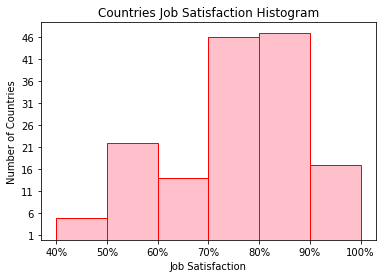

In [19]:
plt.hist(df['Job Satisfaction'], 6, (40,100),  color = 'pink', edgecolor='red')
plt.xticks([40, 50, 60, 70, 80, 90, 100], ['40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.yticks(range(1,50,5))
plt.ylabel("Number of Countries")
plt.xlabel("Job Satisfaction")
plt.title("Countries Job Satisfaction Histogram")
plt.show()

# E.Pairwise Scatter plots

1. Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as opposed to separate commands for each plot.

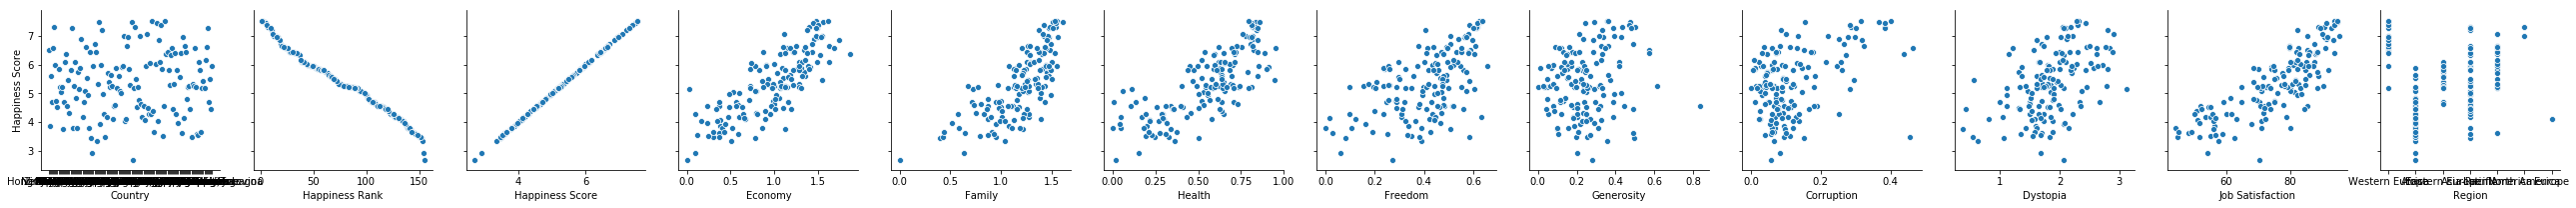

In [20]:
import seaborn as sns
sns.pairplot(df, height=3, x_vars=df.columns, y_vars=['Happiness Score']);

# F.Correlation

1. Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?

In [21]:
df.corr(method='pearson')['Happiness Score'].sort_values(ascending=False)

Happiness Score     1.000000
Job Satisfaction    0.812873
Economy             0.808678
Health              0.777731
Family              0.749612
Freedom             0.567948
Dystopia            0.481117
Corruption          0.438262
Generosity          0.164123
Happiness Rank     -0.992663
Name: Happiness Score, dtype: float64

--> The Job Satisfaction variable has the highest correlataion with the Happiness Score.

# G. Probabilities

1. Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities.

According to the formula $P(B|A) = P(AB) / P(A)$, where $P(AB)$ are all countries from Western Europe with score > 6, i.e. `df[(df['Region']=='Western Europe') & (df['Happiness Score'] > 6)]['Country'].count()` and $P(A)$ are all countries with score > 6, i.e. `df[df['Happiness Score'] > 6]['Country'].count()`

In [22]:
df[(df['Region']=='Western Europe') & (df['Happiness Score'] > 6)]['Country'].count() / df[df['Happiness Score'] > 6]['Country'].count()

0.38636363636363635

# H. Matrices

1. Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 values where entry (
i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

In [23]:
x=df['Region'].values
y=df['Region'].unique()
x=x.reshape(len(x),1)
m = (x == y).astype(int)
m

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

--> m is our matrix

In [24]:
m.shape

(151, 7)